<h1 style="text-align: center;"> Voice Data Analysis </h1>

![](voiceAnalysis.jpeg)

## Table of Content
1. [Introduction](#section1)<br>
2. [Data loading and description](#section2)<br>
3. [Data Interpretation and Visualization](#section3)<br>
4. [Preprocessing the data](#section4)
    - 4.1 [Dropping corelated columns](#section401)<br>
    - 4.2 [Applying stadard scalier](#section402)<br>
    - 4.3 [LabelEncoding the column ](#section403)<br> 
    - 4.4 [Train-Test split](#section404)<br> 
5. [User defined functions](#section5)
    - 5.1 [User defined function to fit and predict the model](#section501)<br>
    - 5.2 [User defined function to print the classifier score](#section502)<br>
6. [Modelling and prediction](#section6)
    - 6.1 [Gaussian Naive Bayes](#section601)<br>
    - 6.2 [KNearest Neighbour Classifier](#section602)<br>
    - 6.3 [Logistic Regression](#section603)<br>
    - 6.4 [without the dropped columns](#section604)<br>
        - 6.2.1 [Using Logistic Regression](#section6041)<br>
        - 6.4.2 [Using K-Nearest Neighbor Classification](#section6042)<br>
        - 6.4.3 [Naive Bayes Classification](#section6043)<br>
7. [Conclusions](#section7)

<a id=section1></a>
## 1. Introduction

#### Gender Recognition by Voice and Speech Analysis
This project is to classify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).
The Dataset is taken from : https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv
The following acoustic properties of each voice are measured and included within the CSV:
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female


Different Algorithms are tried out to see how each algorithm performs on the given data. This project is done as part of assignment of ML-Intermediate course. 

<a id=section2></a>
## 2. Data loading and description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [2]:

voicedata = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv',encoding='latin-1')
voicedata.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voicedata.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [3]:
voicedata.shape

(3168, 21)

In [4]:
voicedata.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
voicedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [6]:
voicedata.isnull().sum().any()

False

#### Observation
There is no data missing in the dataset. 

<a id=section3></a>
## 3. Data Interpretation and Visualization

In [7]:
voicedata.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

Class as pie chart:


Text(0, 0.5, '')

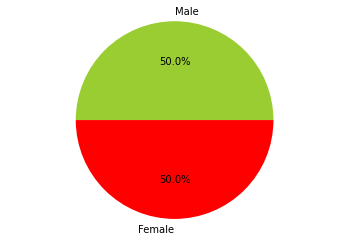

In [8]:
# Check Class variables that has Male Voice and Female voice.
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(voicedata.label.value_counts(),autopct='%1.1f%%', labels=['Male','Female'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

#### Observation

There are 2 categories. Male and female. The data is equally distributed. There are equal number of samples of male and female voice samples.

In [9]:
voicedata.skew()

meanfreq   -0.617495
sd          0.136916
median     -1.012785
Q25        -0.490877
Q75        -0.900311
IQR         0.295432
skew        4.933314
kurt        5.872586
sp.ent     -0.430934
sfm         0.339958
mode       -0.837236
centroid   -0.617495
meanfun     0.039141
minfun      1.878004
maxfun     -2.238535
meandom     0.611022
mindom      1.661114
maxdom      0.726189
dfrange     0.728261
modindx     2.064335
dtype: float64

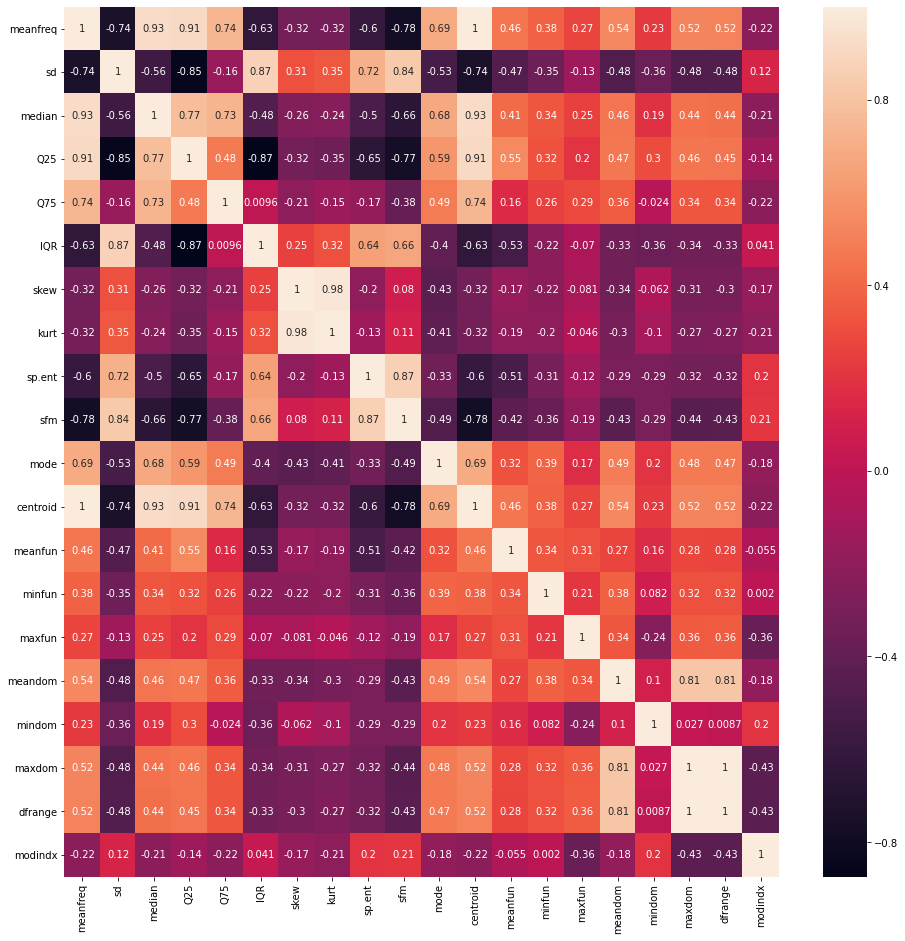

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap( voicedata[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']].corr(), annot=True );

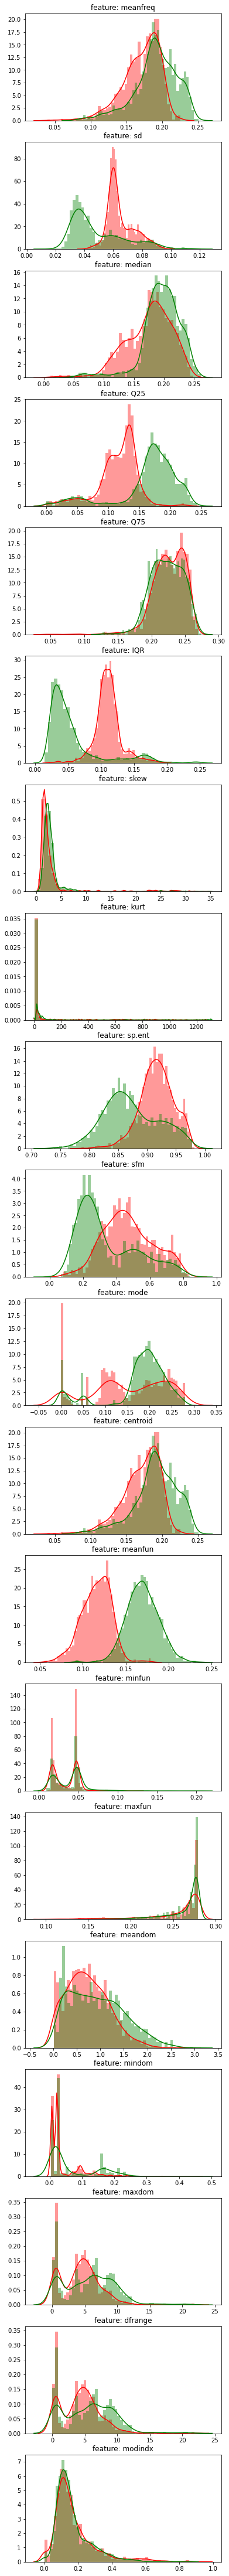

In [11]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(20, 1)
plt.figure(figsize=(6,20*4))
for i, col in enumerate(voicedata[voicedata.iloc[:,0:20].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(voicedata[col][voicedata.label == 'male'], bins=50, color='r')
    sns.distplot(voicedata[col][voicedata.label == 'female'], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()


#### Observation
Data is normally distributed. There is a strong corelation among some columns. Columns :
- meanfreq has corelation with 'median', 'Q25',centroid
- sd has corelation withIQR, sfm'  (inverse)Q25
- skew  has corelation with curt
- sp.ent' has corelation with 'sfm'
- meandom  has corelation with 'maxdom', 'dfrange'

<a id=section4></a>
## 4. Preprocessing the data

<a id=section401></a>
###  4.1 Dropping corelated columns: 
'median', 'Q25','centroid','IQR', 'sfm', 'curt', 'maxdom', 'dfrange' these columns have high corelation with 'meanfreq', 'sd','skew','sp.ent' and meandom. So dropping them.

In [12]:
#After seeing the corelation and the similar distrbution dropping columns : 'median', 'Q25','centroid','IQR', 'sfm', 'curt', 'maxdom', 'dfrange'
dropColumns = ['median', 'Q25','centroid','IQR', 'sfm', 'kurt', 'maxdom', 'dfrange']

voicedata_drop = voicedata.drop(dropColumns,axis=1)
voicedata_drop.head()

,meanfreq,sd,Q75,skew,sp.ent,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,0.059781,0.064241,0.090193,12.863462,0.893369,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.092666,22.423285,0.892193,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.052632,male
2,0.077316,0.083829,0.131908,30.757155,0.846389,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.046512,male
3,0.151228,0.072111,0.207955,1.232831,0.963322,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.247119,male
4,0.135120,0.079146,0.206045,1.101174,0.971955,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,0.208274,male


<a id=section402></a>
###  4.2 Applying stadard scalier

In [13]:
from sklearn.preprocessing import StandardScaler
features = ['meanfreq','sd','Q75','skew','sp.ent','mode','meanfun','minfun','maxfun','meandom','mindom','modindx']
voicedata_drop[features] = StandardScaler().fit_transform(voicedata_drop[features])
voicedata_drop.head()

,meanfreq,sd,Q75,skew,sp.ent,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,-4.049248,0.427355,-5.693607,2.293306,-0.039083,-2.141210,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.454772,male
1,-3.841053,0.611669,-5.588987,4.548056,-0.065236,-2.141210,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.014103,male
2,-3.463066,1.603848,-3.928699,6.513656,-1.083730,-2.141210,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.065344,male
3,-0.992157,0.899998,-0.711205,-0.449858,1.516383,-1.054576,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,0.614286,male
4,-1.530640,1.322561,-0.792029,-0.480911,1.708336,-0.790514,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.289046,male


<a id=section403></a>
###  4.3 LabelEncoding the column
Encoding the column,'label' as 0 and 1

In [14]:
from sklearn.preprocessing import LabelEncoder
voicedata_drop['label'] = LabelEncoder().fit_transform(voicedata_drop['label'])
voicedata_drop.head()

,meanfreq,sd,Q75,skew,sp.ent,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,-4.049248,0.427355,-5.693607,2.293306,-0.039083,-2.141210,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.454772,1
1,-3.841053,0.611669,-5.588987,4.548056,-0.065236,-2.141210,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.014103,1
2,-3.463066,1.603848,-3.928699,6.513656,-1.083730,-2.141210,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.065344,1
3,-0.992157,0.899998,-0.711205,-0.449858,1.516383,-1.054576,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,0.614286,1
4,-1.530640,1.322561,-0.792029,-0.480911,1.708336,-0.790514,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.289046,1


<a id=section404></a>
###  4.4 Train-Test split

Splitting the data for Training & Testing. Train data will be used for training the models and Test data will be used for measuring the models.

In [15]:
from sklearn.model_selection import train_test_split
y = voicedata_drop['label']
X = voicedata_drop.loc[:,voicedata_drop.columns != 'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42, stratify=y)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 12)
(792, 12)
(2376,)
(792,)


<a id=section5></a>
## 5. User defined functions

Defining user defined functions to reuse them with each algorithm

<a id=section501></a>
#### 5.1 User defined function to fit and predict the model

In [16]:
#Function for prediction

def get_predictions(clf, X_train, y_train, X_test, y_test):
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    
    print('train-set confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
    return y_pred, y_pred_prob


<a id=section502></a>
#### 5.2 User defined function to print the classifier score

The function is returning accuracy_score as the goal of the analysis is just to predict the voice type and we are not interested in increasing precision or recall here. Also, since data is equally distributed, accuracy score works best and it is sufficient for us in the analysis. Though the function prints confusion matrix, recall score, precision score, f1 score, ROC AUC and also accuracy score, we are interested only in accuracy score for the project

In [17]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    return  accuracy_score(y_test,y_pred)

<a id=section6></a>
## 6. Modelling and prediction

Applying various models to see which one gives a better result. We are trying:
1. Gaussian Naive Bayees
2. K-Nearest Classifier
3. Logistic regression

<a id=section601></a>
## 6.1 Gaussian Naive Bayes

A naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced.

In [18]:
y_pred_nb, y_pred_prob_nb = get_predictions(GaussianNB(), X_train, y_train, X_test, y_test)

train-set confusion matrix:
 [[350  46]
 [ 19 377]]


In [19]:
print_scores(y_test,y_pred_nb,y_pred_prob_nb)

test-set confusion matrix:
 [[350  46]
 [ 19 377]]
recall score:  0.952020202020202
precision score:  0.8912529550827423
f1 score:  0.9206349206349206
accuracy score:  0.9179292929292929
ROC AUC: 0.9618406285072951


0.9179292929292929

#### Observations:
Accuracy score is 0.9179. Need to see which other algorithm gives a better result.

<a id=section602></a>
## 6.2 KNearest Neighbour Classifier

K-Nearest Neighbours is one of the most basic yet essential classification algorithms which belongs to the supervised learning domain. K-Nearest neighbour can be used as both regressor and for classification.

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

KNN Algorithm is based on feature similarity: Choosing the right value of k is a process called parameter tuning, and is important for better accuracy. 

So in the below code We are checking the kNN for various value of K. K values range from 1 to 28 (28 being sqrt(792). Here 792 is the number of test data points.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list = list(range(1,28,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    print("K=",k)
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred_knn, y_pred_prob_knn = get_predictions(knn, X_train, y_train, X_test, y_test)
    scores = print_scores(y_test,y_pred_knn,y_pred_prob_knn)
    cv_scores.append(scores)
print(cv_scores)
#knn = KNeighborsClassifier(n_neighbors=7)
#y_pred_knn, y_pred_prob_knn = get_predictions(knn, X_train, y_train, X_test, y_test)

K= 1
train-set confusion matrix:
 [[386  10]
 [  7 389]]
test-set confusion matrix:
 [[386  10]
 [  7 389]]
recall score:  0.9823232323232324
precision score:  0.974937343358396
f1 score:  0.9786163522012579
accuracy score:  0.9785353535353535
ROC AUC: 0.9785353535353535
K= 3
train-set confusion matrix:
 [[380  16]
 [  9 387]]
test-set confusion matrix:
 [[380  16]
 [  9 387]]
recall score:  0.9772727272727273
precision score:  0.9602977667493796
f1 score:  0.9687108886107635
accuracy score:  0.9684343434343434
ROC AUC: 0.9880241812059996
K= 5
train-set confusion matrix:
 [[380  16]
 [  9 387]]
test-set confusion matrix:
 [[380  16]
 [  9 387]]
recall score:  0.9772727272727273
precision score:  0.9602977667493796
f1 score:  0.9687108886107635
accuracy score:  0.9684343434343434
ROC AUC: 0.992201050913172
K= 7
train-set confusion matrix:
 [[377  19]
 [  9 387]]
test-set confusion matrix:
 [[377  19]
 [  9 387]]
recall score:  0.9772727272727273
precision score:  0.9532019704433498
f1 s

The accuracy_scores of different k values can be plotted to see which k value to chose

<Figure size 432x288 with 0 Axes>

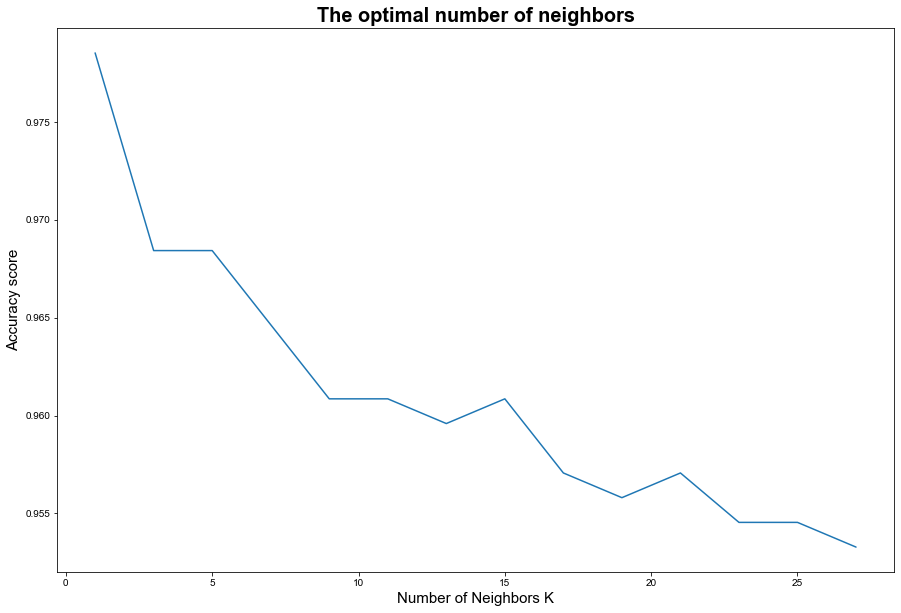

In [21]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)

plt.show()

### Observations:

We are getting the best results with k=1. Since k=1 can be overfitting, we can choose k=3 or 5, both of which are giving almost same results. ROC AUC of K=5 is slightly better than ROC-AUC score of k=3.  K=5 is chosen here and the acuracy_score for k=5 is: 0.9684

<a id=section603></a>
## 6.3 Using Logistic Regression

Logistic regression is a supervised learning techinques which helps in classification problems.Logistic Regression is used when the dependent variable(target) is categorical. Sigmoid function or logistic function is used as hypothesis function for logistic regression.

In [22]:
# let us check recall score for logistic regression
y_pred_lr, y_pred_prob_lr = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
                                      , X_train, y_train, X_test, y_test)

train-set confusion matrix:
 [[375  21]
 [  9 387]]


In [23]:
print_scores(y_test,y_pred_lr,y_pred_prob_lr)

test-set confusion matrix:
 [[375  21]
 [  9 387]]
recall score:  0.9772727272727273
precision score:  0.9485294117647058
f1 score:  0.9626865671641791
accuracy score:  0.9621212121212122
ROC AUC: 0.9926984491378431


0.9621212121212122

#### Observations
Accuracy score for logistic regression is 0.9621. Logistic regression is performing better than Naive Bayes and almost equal to KNN. 

<a id=section604></a>
## 6.4  without the dropped columns

Just to see how the algorithms perform when the dropped columns are included in the analysis. 

In [24]:
voicedata.head()
voicedata.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [25]:
#Applying Standard scaler
features_vc = ['meanfreq','sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt','sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun','meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
voicedata[features_vc] = StandardScaler().fit_transform(voicedata[features_vc])
voicedata.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,male
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,male
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,male
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,male
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,male


In [26]:
#Label encoding the label column
from sklearn.preprocessing import LabelEncoder
voicedata['label'] = LabelEncoder().fit_transform(voicedata['label'])
voicedata.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,1
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,1
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,1
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,1
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,1


In [27]:
# Test/Train split
from sklearn.model_selection import train_test_split
y_fl = voicedata['label']
X_fl = voicedata.loc[:,voicedata.columns != 'label']
X_train_fl, X_test_fl, y_train_fl, y_test_fl = train_test_split(X_fl, y_fl, test_size=0.25,
                                                    random_state=42, stratify=y_fl)

print(X_train_fl.shape)
print(X_test_fl.shape)
print(y_train_fl.shape)
print(y_test_fl.shape)

(2376, 20)
(792, 20)
(2376,)
(792,)


<a id=section6041></a>
### 6.4.1 Using Logistic Regression

In [28]:
# let us check accuracy score for logistic regression
y_pred_lr_fl, y_pred_prob_lr_fl = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
                                      , X_train_fl, y_train_fl, X_test_fl, y_test_fl)

train-set confusion matrix:
 [[378  18]
 [  5 391]]


In [29]:
print_scores(y_test_fl,y_pred_lr_fl,y_pred_prob_lr_fl)

test-set confusion matrix:
 [[378  18]
 [  5 391]]
recall score:  0.9873737373737373
precision score:  0.9559902200488998
f1 score:  0.9714285714285714
accuracy score:  0.9709595959595959
ROC AUC: 0.9942480359147026


0.9709595959595959

<a id=section6041></a>
### 6.4.2 Using K-Nearest Neighbor Classification

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
y_pred_knn_fl, y_pred_prob_knn_fl = get_predictions(knn, X_train_fl, y_train_fl, X_test_fl, y_test_fl)
scores = print_scores(y_test_fl,y_pred_knn_fl,y_pred_prob_knn_fl)

train-set confusion matrix:
 [[380  16]
 [  8 388]]
test-set confusion matrix:
 [[380  16]
 [  8 388]]
recall score:  0.9797979797979798
precision score:  0.9603960396039604
f1 score:  0.9700000000000001
accuracy score:  0.9696969696969697
ROC AUC: 0.9953895010713193


<a id=section6043></a>
### 6.4.3 Naive Bayes Classification

In [31]:
y_pred_nb_fl, y_pred_prob_nb_fl = get_predictions(GaussianNB(), X_train_fl, y_train_fl, X_test_fl, y_test_fl)
scores = print_scores(y_test_fl,y_pred_nb_fl,y_pred_prob_nb_fl)

train-set confusion matrix:
 [[353  43]
 [ 35 361]]
test-set confusion matrix:
 [[353  43]
 [ 35 361]]
recall score:  0.9116161616161617
precision score:  0.8935643564356436
f1 score:  0.9025000000000001
accuracy score:  0.9015151515151515
ROC AUC: 0.950846852362004


<a id=section7></a>
## 7. Conclusion

In this exercise, we are interested in how well the algorithms can classify the voice data as male/female. we are not interested in giving importance to any one type of classification, like classifying male voice is more important than female or vice versa. so recall or precision score is not important here. Since the data is equally distributed among the 2 classes accuracy score will perform well. Only accuracy score is enough for comparing the results of various data here. 


<table style="border: 1px solid black; border-collapse: collapse; background-color:#dce5e6; width:70%; align=left;">
    <tr>
        <th> Accuracy Score:</th>        <th>  Dropped Column</th>  <th>   Full Data</th>
    </tr>
    <tr>
        <td> Naive Bayes </td>     <td>0.9179 </td>    <td> 0.9508  </td>
     <tr>
        <td> K-Nearest Neighbour </td>     <td>0.9684  </td>    <td> 0.9696  </td>
     </tr>
     <tr>
        <td> Logistic Regression </td>     <td>0.9621   </td>    <td> 0.9709  </td>
     </tr>
 </table>

Both K-Nearest neighbour and Logistic regression are giving good accuracy. when columns are not dropped, all the algorithms improve on accuracy, though, Naive Bayse has improved considerably. 